1.1 Importar librerias

In [1]:
%pip install seaborn



Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [5]:
import spacy
spacy.info()


{'spacy_version': '3.8.4',
 'location': 'c:\\Users\\SebOg\\anaconda3\\Lib\\site-packages\\spacy',
 'platform': 'Windows-11-10.0.22631-SP0',
 'python_version': '3.12.7',
 'pipelines': {'es_core_news_sm': '3.8.0'}}

In [6]:
!python -m spacy download es_core_news_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [7]:
import spacy
nlp = spacy.load("es_core_news_sm")
print("Modelo cargado correctamente")


Modelo cargado correctamente


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


**1.2 Cargar el data set**

*1.2.1 Data set de entrenamiento*

El conocer la estructura de los datos de entrenamiento permite ver que estos están etiquetados ya que contienen una columna llamada 'Label', que indica si la noticia es real o falsa.

In [9]:
df_entrenamiento = pd.read_csv("fake_news_spanish.csv", delimiter=';')
df_entrenamiento.head()



,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


*1.2.2 Data set de prueba*

El conocer la estructura de los datos permite saber de forma exacta los datos de prueba, para de esta forma poder compararlo con los datos de entrenamiento los cual están etiquetados y así poder entender cual es la variable objetivo para el modelo.

In [10]:
df_prueba = pd.read_csv("fake_news_test.csv", delimiter=';')
df_prueba.head()

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


**2. Entendimiento de los datos**

**2.1 Estadísticas Descriptivas de los datos** 

*2.1.1 Estadísticas Descriptivas de los datos de entrenamiento*

Estos datos estadísticos permite conocer más a fondo los datos de entrenamiento que se usa para la construcción del modelo. En este caso, con estas estadísticas se sabe que hay un total de 57.063 noticias en los datos, de los cuales el 58.1% de estas noticias están etiquetadas como reales (1), lo que indica un ligero desequilibrio en las clases, pues hay más noticas reales que falsas. Adeemás, estos datos tiene una desviación estandar de 0.493 que muestra que los datos están bastante dispersos entre 0 y 1, lo qu es esperable en una variable binaria. Así mismo, se confirma que el mínimo y el máximo son 0 y 1 respectivamente, lo que indica que solo hay dos valores en esta columna 0 y 1 que es lo que se espera que ocurra. Por otra parte, se tiene el que 25% de los datos tienen un label igual a 0 lo que quiere decir que son noticias falsas. La medidana (50%) es 1, lo que significa que más de la motad de los datos son noticas reales y ocurre lo mismo con el 75% de los datos que tienen este mismo label.

Debido a que hay más noticias reales que falsas, se puede generar un desbalance de clases y esto puede afectar a algunos modelos candidatos como la Regresión Logística, Random Forest o SVM, ya que podrían sesgarse hacia la clase mayoritaria. Para pdoer corregir este desbalance se pueden usar estrategias de balanceo como undersampling, oversmapling o ponderar las clases en el modelo. 

También, el confirmar que hay datos binarios quiere decir que solo se puede usar modelos de clasificación binaria como: Regresión Logística, Random Forest. SVM o Máquinas de Vectores de Soporte o Redes Neuronales. 

De la misma forma, el conocer estos datos permite determinar que una de las métricas importantes para el modelo es el de Precisión ya que permite minimizar falsos positivos es decir que se etiquete como falsa una noticia que es verdadera.

In [11]:
describe=df_entrenamiento.describe()
print(describe)

              Label
count  57063.000000
mean       0.581077
std        0.493387
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


*2.1.2 Estadísticas Descriptivas de los datos de prueba*

El conocer las estadísticas de los datos de prueba, permita conocer cuales son las variables más importante para el modelo. Utilizando este análisis se puede ver que se tiene una columna denominada ID que parece un identificador pero que no tiene valor para el modelo, por lo que no se debería tomar en cuenta a la hora de realizar el modelo. En la columna del título dice que hay 999 valores válidos y 997 títulos únicos, lo que sugiere que dos títulos están repetidos. Lo mismo ocurre con las descripcciones en las que hay 995 descripciones únicas, lo que sugiere que algunas noticias tienen descripciones repetidas. El concoer que hay títulos y descripciones repetídas podría afectar la efectividad del modelo, es por esto que se sugiere eliminar los que estén repetidos para que de esta forma no afecten el resultado final. Por último con la columna de las fechas, se muestra que hay 775 fechas únicas, lo que indica que algunas noticias comparten la misma fecha, sin embarho estas no afectan el contenido del  texto.


In [12]:
describe=df_prueba.describe()
print(describe)

          ID                                             Titulo  \
count   1000                                                999   
unique     1                                                997   
top       ID  La Junta Electoral multa con 1.000 euros a 'AB...   
freq    1000                                                  2   

                                              Descripcion       Fecha  
count                                                1000        1000  
unique                                                995         755  
top     La vicepresidenta ha asegurado que el Gobierno...  24/06/2019  
freq                                                    2           5  


**2.2 Conteo de las clases en Label de los Datos de Entrenamiento**

Estos datos muestra la distribución de etiquetas en el conjunto de datos de entrenamiento, en estas se indica que hay 33.158 noticias clasificadas como reales y 23.905 como falsas. Lo que muestra un desbalance de clases, que si bien, no es un desbalance extremo, podría llegar a afectar los resultados del modelo y de esta forma que no logre identificar de forma correcta las noticias falsas. 

In [13]:
label_count = df_entrenamiento['Label'].value_counts()
print(label_count)

Label
1    33158
0    23905
Name: count, dtype: int64


**2.3 Variables numéricas y categóricas**


*2.3.1-1 Variables numéricas para los datos de entrenamiento*

El saber la longitud del título y la descripción puede ser relevate para el análisis. Pues un título más largo podría ser una señal de que un artículo es más detallado o contiene en el más contexto. Ya que se busca analizar noticias falsas, la longitud dedl título podría ayudar a diferenciar entre títulos "informales" es decir más cortos y títulos más detallados, los culaes podrían ser más caracteristicos de ciertos tipos de contenidos. 

De la misma forma, las descripciones más largas podrían ser más informativas y detalladas, mientras que las descripciones cortas podrían ser características de resúmenes o contenido más superficial. En el contexto de este ejemplo, las descripciones breves pueden estar asociadas con información o incluso engañosa

In [14]:
df_entrenamiento['Fecha']=pd.to_datetime(df_entrenamiento['Fecha'], errors='coerce')
df_entrenamiento['longitud_titulo'] = df_entrenamiento['Titulo'].apply(lambda x: len(str(x)))
df_entrenamiento['longitud_descripcion'] = df_entrenamiento['Descripcion'].apply(lambda x: len(str(x)))


*2.3.1-2 Variables numéricas para los datos de prueba*

In [15]:
df_prueba['Fecha']=pd.to_datetime(df_prueba['Fecha'], errors='coerce')
df_prueba['longitud_titulo'] = df_prueba['Titulo'].apply(lambda x: len(str(x)))
df_prueba['longitud_descripcion'] = df_prueba['Descripcion'].apply(lambda x: len(str(x)))


C:\Users\SebOg\AppData\Local\Temp\ipykernel_18156\4132102996.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_prueba['Fecha']=pd.to_datetime(df_prueba['Fecha'], errors='coerce')


*2.3.2-1 Separar las variables categóricas y numéricas pra los datos de entrenamiento*

La clasificación de las variables en categóricas y numéricas permite determinar cuales son las más importantes para el modelo. Se clasifica como categóricas a las variables label, título y descripción. Estas variables son importantes pues, la variable de label se usa como variable objetivo (y) en la clasificación. Mientras que as variables de título y descripción se deben procesar con téctincas de vectorización (TF-IDF, CountVectorizer, Word Embeddings) para de esta forma convertirlas en representaciones numéricas antes de entrenar el modelo. 

Por otra parte, se determina como variables numéricas, a las variables de Longitud de Título, Longitud de Descripción y Fecha, sin embargo, esta última no es una variable numérica pero se puede convertir a una. De la misma forma, las longitudes de título y descripción se pueden normalizar o estandarizar para mejorar el rendimiento del modelo. 

In [16]:
categoricas = ['Label', 'Titulo', 'Descripcion']
numericas = ['longitud_titulo', 'longitud_descripcion', 'Fecha']

*2.3.1-2 Separar las variables categóricas y numéricas para los datos de prueba*

Dado que para los datos de prueba no hay una columna Label, se sabe que las variables categóricas para estos son las variables de título y Descripción las cuales sirven para enviar al modelo y que este pueda determinar cuales son verdaderqas y cuales son falsas. 

Por otra parte, las variables numéricas al igual que los datos de entrenamiento las variables son las longitude sde título y descripción las cuales también se estandarizan y normalizan.

In [17]:
categoricas = ['Titulo', 'Descripcion']
numericas = ['longitud_titulo', 'longitud_descripcion', 'Fecha']

*2.3.3 Análisis de las variables categóricas*

1.1 Label para los datos de entrenamiento

Esta gráfica muestra lo anteriormente analizado en donde se muestra la distribución de la etiqueta Label, el cual muestra el pequeño desbalance que ocurre entre los datos etiquetados como falsos y verdaderos. Para el cual la mejor solución es evitar que el modelo se sesgue hacia la clase mayoritaria (1) realizando un balanceo de estas clases. 

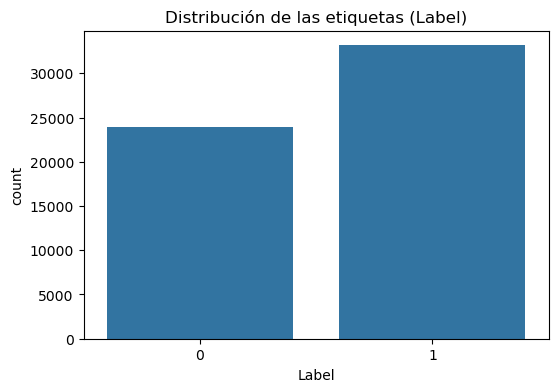

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df_entrenamiento)
plt.title('Distribución de las etiquetas (Label)')
plt.show()



*2.3.4 Análisis de las variables numéricas*

1. Longitud del Título

1.1 Longitud de Título para los datos de entrenamiento

Esta gráfica es un boxplot que representa la distribución de la longitud de los títulos en los datos de entrenamiento. Esta gráfica muestra que el rango itercuartílico se tiene que la mayoría de los títulos tienen una longitus entre aproximadamente 80 y 120 caracteres, mientras que la mediana para estar cercana a 100 caracteres. Además, muestra que existen valores atípicos en ambos extremos, de parte de los cortos se tiene qye hay algunos títulos que tienen menos de 50 caracteres, por el otro lado, hay títulos que superan los 150-200 caracteres, con algunos casos extremos que superan los 250. Esto puede afectar al modelo pues si los títulos son muy cortos o largos generarían ruido en el modelo lo que podría afectar su precisión. Para poder manejar esto se podría hacer un filtrado de outliers usando el IQR y realizar la normalización de longitud para que el modelo no se sesgue por los títulos muy largos. La longitud del título es un factor clave en la clasificación, pues este permite analizar la correlación con la etiqueta Label para de esta forna determinar su relevancia. 

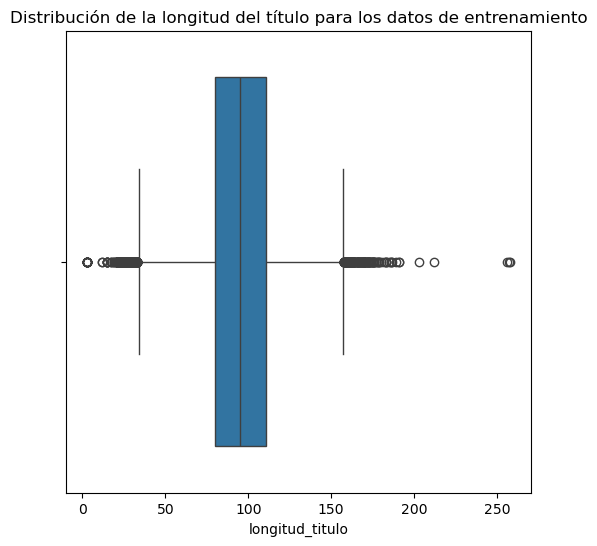

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_entrenamiento['longitud_titulo'])
plt.title('Distribución de la longitud del título para los datos de entrenamiento')
plt.show()


1.2 Longitud de Título para los datos de Prueba

Este boxplot represnta la distribución de la longitud de los títulos en el conjunto de prueba. Una de las partes más importantes de esta gráfica es que la medianaparece estar cerca de los 100 caracteres y la mayoría de los títulos tienen entre 80 y 120 caracteres. Existen algunos títulos muy cortos es decir que tienen menos de 40 caracteres y muy largos con más de 150 caracteres. Sin embargo, los valores extresmos no son tan prinunciados como en los datos de entrenamiento. 

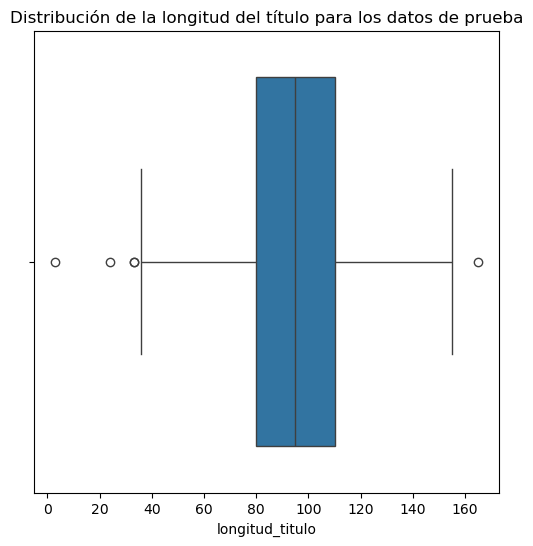

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_prueba['longitud_titulo'])
plt.title('Distribución de la longitud del título para los datos de prueba')
plt.show()


2. Longitud de la Descripción

2.1 Longitud de la Descripción de los datos de Entrenamiento

Este gráfico represneta la longitud de las descripciones en el conjunto de los datos de entrenamiento. En este se puede observar que la mayoría de las descripciones tienen longitudes relativamente bajas. Sin embargo, hay una gran cantidad de valores atípicos (outliers) con descripciones muy largas superando los 10.000 caracteres. La presencia de textos extremadamente largos podría afectar el procesamiento de texto y la eficiencia del modelo, para esto puede ser conveniente aplicar la normalización para reducir su impacto. La longitud de la descripción es una característica relevante, el modelo podría sesgarse hacia las noticias con descripciones largas. 

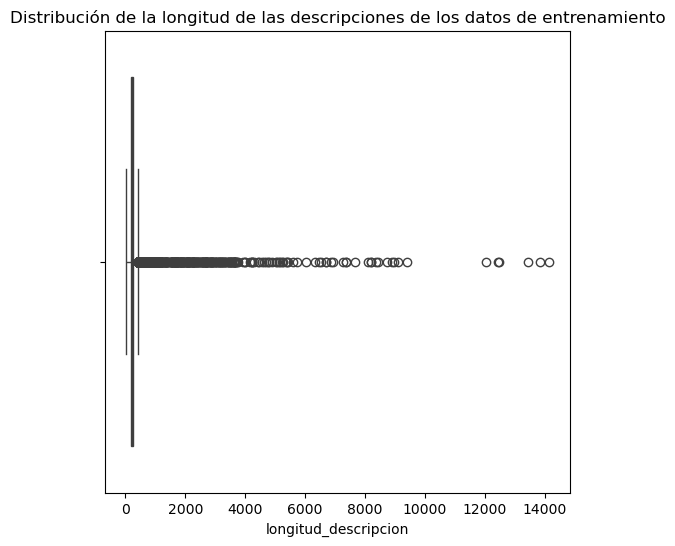

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_entrenamiento['longitud_descripcion'])
plt.title('Distribución de la longitud de las descripciones de los datos de entrenamiento')
plt.show()



2.2 Longitud de la descripción de los datos de Prueba

Comparando con la anterior gráfica se pueden observar varias diferencias claves. Primero es que la mayoría de las descripciones son mucho más cortas en comparación con el conjunto de entrenamiento, por lo que se observa un fuerte sesgo hacia longitudes pequeñas, con un rango bastante reducido. Aunque en los datos existen outliers, su magnitud es mucho menor en comparación con los datos de entrenamiento, esto se puede ver con que el valor máximo en el conjunto de prueba supera los 2500 caracteres, mientras que en el entrenamiento llegaba a más de 14.000 caracteres. Ahora bien, esto podría generar un impacto en el modelo, pues si se entrenó con descripciones mucho más largas que las de prueba, podría haber un desbalance en el aprendizaje y esto podría llevar a problemas de generalización, ya que las características de los textos son distintas en a,bos conjuntos. Para solucionar esyo se podría considerar truncar o normalizar las longitudes en el conjunto de entrenamiento para hacer coincidan más datos de prueba.

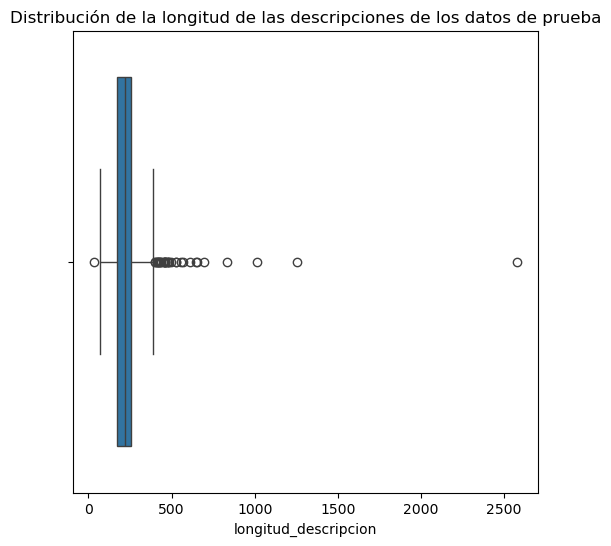

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_prueba['longitud_descripcion'])
plt.title('Distribución de la longitud de las descripciones de los datos de prueba')
plt.show()



3. Fechas

3.1 Fechas para los datos de Entrenamiento

El gráfico de caja y bigotes muestra la distribución de los años en los datos de entrenamiento. Algunas de las observaciones claves se puede ver que los datos abarcan desde aproximadamente 206 hasta 2024. Esto sugiere que el conjunto de entrenamiento tiene información distribuida en un periodo de 8 años. Además, se evidencia quee la mediana está cerca de 2020, lo que indica que la mitad de los datos está antes y la otra midad después de este año. Así mismo, muestra que el rango intercuartil se encuentra aproximadamente entre 2019 y 2022 esto sugiere que la mayoría de los datos provienen de estos años. Se observan bigotes extendidtos hasta 2016 y 2024, lo que sugiere que hay algunos datos en los extremos, pero no necesariamente valores atípicos. Lo que permite reiterar nuevamente que esta variable no afecta el modelo que se desea generar. 

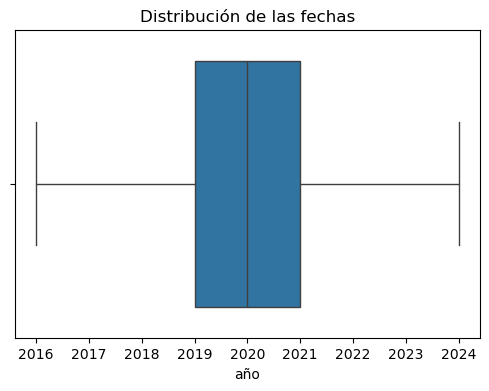

In [23]:
df_entrenamiento['año']=df_entrenamiento['Fecha'].dt.year
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_entrenamiento['año'])
plt.title('Distribución de las fechas')
plt.show()

3.2 Fechas para los datos de prueba

Comparando la grafica de los datos de entrenamiento y de prueba se puede ver que en este el rango de fechas es entre 2016- 2023. Así mismo, se ve que la mediana de este conjunto también es aproximadamente 2020 y que el 50% de los datos estan entre 2019-2021, lo que indica que los datos de entrenamiento contienen ejemplos más recientes que los de prueba. Sin embnargo, estos datos no muestran ser tan relevantes para el modelo. 

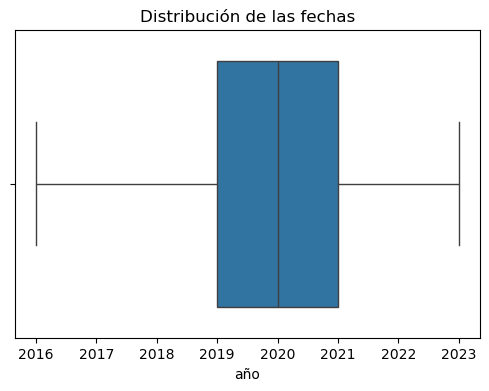

In [24]:
df_prueba['año']=df_prueba['Fecha'].dt.year
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_prueba['año'])
plt.title('Distribución de las fechas')
plt.show()

4. Estadísticas Descriptivas para las Variables Numéricas

4.1 Estadísticas Descriptivas para las variables numéricas para los datos de entrenamiento

Con este análisis estadístico permite ver que la longitud de los títulos tiene un promedio de 94.77 caracteres, con un mínimo y máximo de 3-255 caracteres. También se puede ver que el 25% de estos datos tienen 80 caracteres mientras que el 50% tiene 95 y el 75% 111 caracteres, que tienen algunos valores atípicos que pueden ser muy cortos o extremadamente largos. Con estos datos se considera que se debe realizar un preprocesamiento de estos datos eliminando textos que puedan llegar a sesgar el modelo. 

In [25]:
info=df_entrenamiento[numericas].describe()
print(info)

       longitud_titulo  longitud_descripcion                          Fecha
count     57063.000000          57063.000000                          21740
mean         94.770394            243.519724  2020-08-03 05:41:15.289788416
min           3.000000             33.000000            2016-02-01 00:00:00
25%          80.000000            171.000000            2019-04-04 18:00:00
50%          95.000000            221.000000            2020-06-06 00:00:00
75%         111.000000            267.000000            2021-12-04 00:00:00
max         258.000000          14153.000000            2024-12-11 00:00:00
std          21.878669            274.479568                            NaN


4.2 Estadísticas Descriptivas para las Variables Numéricas para los datos de prueba

Ahora bien, analizando estos datos de prueba con los anteriores de entrenamiento, se puede ver que la media de los datos es 94.53 y que el título más largo tiene 165 caracteres lo que indica que hay menos títulos extremadamente largos. Así mismo se ve que hay una desviación estandar de 20.50, lo que sugiere que hay una distribución más homogenea entre los datos. Estas distribuciones permiten ver que son consistentes entre los datos de entrenamiento y prueba por lo que su impacto en el modelo es reducido. Auqnue hay menos outliers en las descripciones de prueba, sigue habiendo algunos largos(>2.500) y unos más cortos de mínimo 3 caracteres que podrían afectar el rendimiento del modelo.

In [26]:
info=df_prueba[numericas].describe()
print(info)

       longitud_titulo  longitud_descripcion                          Fecha
count      1000.000000           1000.000000                           1000
mean         94.532000            230.712000  2020-07-23 01:29:16.800000256
min           3.000000             36.000000            2016-06-18 00:00:00
25%          80.000000            171.000000            2019-04-07 18:00:00
50%          95.000000            220.500000            2020-05-19 00:00:00
75%         110.000000            259.250000            2021-11-22 00:00:00
max         165.000000           2577.000000            2023-11-28 00:00:00
std          20.499835            120.401834                            NaN


5. Valores atípicos en la longitud de Título y Descripción

5.1 Detección de valores atípicos en la longitud de título y descripción de los datos de entrenamiento

Las gráficas permiten ver los datos atípicos para la longitud de título y de la descripción. En ambas gráficas se puede ver que hay muchos valores atípicos. Auqnue no todos los datos son atípicos, hay una gran cantidad de datos con longitudes mucho mayores al promedio. Lo cual podria afectar el rendimiento de modelos, especialemnte aquellos sensibles a la escala de datos como los son la regresión lienal, KNN y redes neuronales. Por lo tanto, se deben considerar métodos para manejar esto valores como los on la normalización o ls eliminación de outliers si esto es apropiado para el modelo. 

Valores atípicos en la longitud del título: 57063
Valores atípicos en la longitud de la descripción: 15045


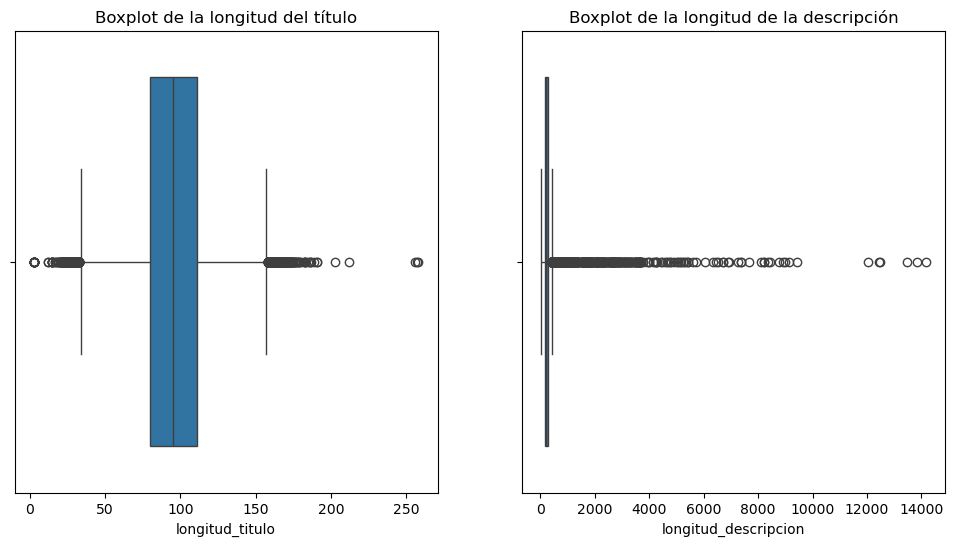

In [27]:
Q1_titulo = df_entrenamiento['longitud_titulo'].quantile(0.25)
Q3_titulo = df_entrenamiento['longitud_titulo'].quantile(0.75)
IQR_titulo = Q3_titulo - Q1_titulo

lim_inf_titulo = Q1_titulo - 1.5 * IQR_titulo
lim_inf_titulo = Q3_titulo + 1.5 * IQR_titulo
atipicos_titulo = df_entrenamiento[(df_entrenamiento['longitud_titulo'] < lim_inf_titulo) | (df_entrenamiento['longitud_titulo'] > lim_inf_titulo)]

#Longitud de la descripción
Q1_desc= df_entrenamiento['longitud_descripcion'].quantile(0.25)
Q3_desc = df_entrenamiento['longitud_descripcion'].quantile(0.75)
lim_inf_desc = Q1_desc - 1.5 * IQR_titulo
lim_sup_desc = Q3_desc + 1.5 * IQR_titulo
atipicos_desc = df_entrenamiento[(df_entrenamiento['longitud_descripcion'] < lim_inf_desc) | (df_entrenamiento['longitud_descripcion'] > lim_sup_desc)]

print(f"Valores atípicos en la longitud del título: {len(atipicos_titulo)}")
print(f"Valores atípicos en la longitud de la descripción: {len(atipicos_desc)}")

# Graficar boxplots para visualizar valores atípicos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_entrenamiento['longitud_titulo'])
plt.title("Boxplot de la longitud del título")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_entrenamiento['longitud_descripcion'])
plt.title("Boxplot de la longitud de la descripción")

plt.show()

5.2 Detección de Valores Atípicos de la Longitud de Título y Descripción de los datos de prueba

Estas gráficas muestran los avlores atípicos para la longitud de título y descripción. En este se puede ver que estos datos tienen una distribución más centrada, lo que significa que hay pocos valores atípicos, los cuales parecen ser títulos inusualmente cortos o largos, lo que muestra que la distribución en los datos de prueba es más controlada. Considerando todo esto, se debe asegurar que el modelo no se vea afectado por diferencias en la distribución. 

Valores atípicos en la longitud del título: 999
Valores atípicos en la longitud de la descripción: 258


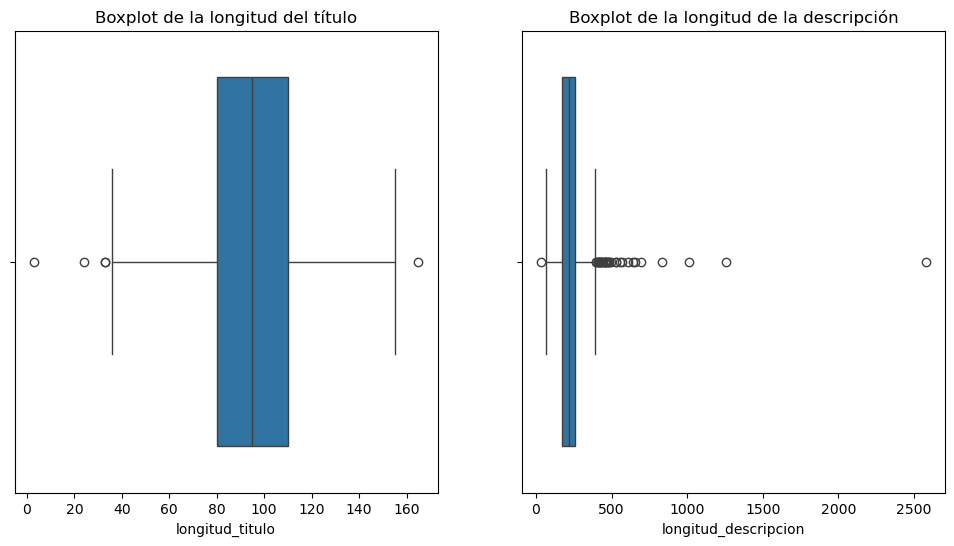

In [28]:
Q1_titulo = df_prueba['longitud_titulo'].quantile(0.25)
Q3_titulo = df_prueba['longitud_titulo'].quantile(0.75)
IQR_titulo = Q3_titulo - Q1_titulo

lim_inf_titulo = Q1_titulo - 1.5 * IQR_titulo
lim_inf_titulo = Q3_titulo + 1.5 * IQR_titulo
atipicos_titulo = df_prueba[(df_prueba['longitud_titulo'] < lim_inf_titulo) | (df_prueba['longitud_titulo'] > lim_inf_titulo)]

#Longitud de la descripción
Q1_desc= df_prueba['longitud_descripcion'].quantile(0.25)
Q3_desc = df_prueba['longitud_descripcion'].quantile(0.75)
lim_inf_desc = Q1_desc - 1.5 * IQR_titulo
lim_sup_desc = Q3_desc + 1.5 * IQR_titulo
atipicos_desc = df_prueba[(df_prueba['longitud_descripcion'] < lim_inf_desc) | (df_prueba['longitud_descripcion'] > lim_sup_desc)]

print(f"Valores atípicos en la longitud del título: {len(atipicos_titulo)}")
print(f"Valores atípicos en la longitud de la descripción: {len(atipicos_desc)}")

# Graficar boxplots para visualizar valores atípicos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_prueba['longitud_titulo'])
plt.title("Boxplot de la longitud del título")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_prueba['longitud_descripcion'])
plt.title("Boxplot de la longitud de la descripción")

plt.show()

6. Valores atípicos en las fechas

6.1 Valores atípicos en las fechas de los datos de entrenamiento

La cantidad de valores atípcios demuestra una vez más que esta variable no es importante para el modelo. Pues esta al el objetivo de este modelo ser clasificar esta variable no aporta información semántica del contenido que permita determinar si una noticia es verdadera o falsa. 

In [29]:
lim_inf_fecha = df_entrenamiento['año'].min()-1
lim_sup_fecha = df_entrenamiento['año'].max()+1
atipicos_fecha = df_entrenamiento[(df_entrenamiento['año'] < lim_inf_fecha) | (df_entrenamiento['año'] > lim_sup_fecha)]
print(f"Valores atípicos en la fecha: {len(atipicos_fecha)}")

Valores atípicos en la fecha: 0


6.2 Valores atípicos en las fechas de los datos de prueba

La cantidad de valores atípcios demuestra una vez más que esta variable no es importante para el modelo. Pues esta al el objetivo de este modelo ser clasificar esta variable no aporta información semántica del contenido que permita determinar si una noticia es verdadera o falsa. 

In [30]:
lim_inf_fecha = df_prueba['año'].min()-1
lim_sup_fecha = df_prueba['año'].max()+1
atipicos_fecha = df_prueba[(df_prueba['año'] < lim_inf_fecha) | (df_prueba['año'] > lim_sup_fecha)]
print(f"Valores atípicos en la fecha: {len(atipicos_fecha)}")

Valores atípicos en la fecha: 0


7. Resumen de las variables

7.1 Resumen de las variables de los datos de entrenamiento

In [31]:
# Resumen
print("\nResumen de las variables:")
print("Variables categóricas: Label, Titulo, Descripcion")
print("Variables numéricas: longitud_titulo, longitud_descripcion, año")

# Mostrar algunas muestras de los valores atípicos
print("\nMuestras de valores atípicos en longitud_titulo:")
print(atipicos_titulo.head())

print("\nMuestras de valores atípicos en longitud_descripcion:")
print(atipicos_desc.head())

print("\nMuestras de valores atípicos en fechas:")
print(atipicos_fecha.head())


Resumen de las variables:
Variables categóricas: Label, Titulo, Descripcion
Variables numéricas: longitud_titulo, longitud_descripcion, año

Muestras de valores atípicos en longitud_titulo:
   ID                                             Titulo  \
0  ID  La mesa del congreso censura un encuentro inte...   
1  ID  La brecha digital que dificulta el acceso de a...   
2  ID  PP apremia al EQUO a presentar una propuesta d...   
3  ID  De soberano garante de la democracia a rey cor...   
4  ID  El Gobierno aprobará este martes detraer los b...   

                                         Descripcion      Fecha  \
0  Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid... 2018-10-30   
1  No es la primera vez que los ciudadanos vulner... 2023-03-15   
2  El partido morado reprocha que los socialistas... 2019-07-01   
3  La renuncia de Felipe VI a su herencia, proced... 2020-03-16   
4  El Ejecutivo también prorrogará la suspensión ... 2021-09-13   

   longitud_titulo  longitud_descripcion   añ

7.2 Resumen de las variables de los datos de prueba

In [32]:
# Resumen
print("\nResumen de las variables:")
print("Variables categóricas: Label, Titulo, Descripcion")
print("Variables numéricas: longitud_titulo, longitud_descripcion, año")

# Mostrar algunas muestras de los valores atípicos
print("\nMuestras de valores atípicos en longitud_titulo:")
print(atipicos_titulo.head())

print("\nMuestras de valores atípicos en longitud_descripcion:")
print(atipicos_desc.head())

print("\nMuestras de valores atípicos en fechas:")
print(atipicos_fecha.head())


Resumen de las variables:
Variables categóricas: Label, Titulo, Descripcion
Variables numéricas: longitud_titulo, longitud_descripcion, año

Muestras de valores atípicos en longitud_titulo:
   ID                                             Titulo  \
0  ID  La mesa del congreso censura un encuentro inte...   
1  ID  La brecha digital que dificulta el acceso de a...   
2  ID  PP apremia al EQUO a presentar una propuesta d...   
3  ID  De soberano garante de la democracia a rey cor...   
4  ID  El Gobierno aprobará este martes detraer los b...   

                                         Descripcion      Fecha  \
0  Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid... 2018-10-30   
1  No es la primera vez que los ciudadanos vulner... 2023-03-15   
2  El partido morado reprocha que los socialistas... 2019-07-01   
3  La renuncia de Felipe VI a su herencia, proced... 2020-03-16   
4  El Ejecutivo también prorrogará la suspensión ... 2021-09-13   

   longitud_titulo  longitud_descripcion   añ

**3. Variable Objetivo**

La idea del entrenamiento de estos módelos es poder clasificar con 0 o 1 las noticias, para de esta forma determinar si son falsas o verdaderas. Por lo tanto, la variable objetivo del modelo es el Label. 

**4. Preprocesamiento de los datos**

**4.1 Eliminación de Nulos**

*4.1.1 Eliminación de Nulos en los datos de entrenamiento*

En este punto se realiza una limpieza de los valores nulos que hay en los datos de entrenamiento. Antes de realizar la limpieza se tenian 16 registros de títulos que no tenian un valor. Sin embargo, después de la limpieza, los datos de prueba ya no tienen valores nulos, lo que indica que se realizó un buen preprocesamiento. Este proceso es bueno para el modelo, pues esto evita que los datos tenga datos incompletos o sin sentido, El título es una variable clave para el análisis de noticias falsas, ya que puede contener palabras clave o patrones importantes. Si el título está vacío, al información proporcionada en ese registro es parcial y podría generar ruido en el modelo. Además, si se mantienen registros sin títulos, el modelo podría aprender de datos incompletos y ahcer predicciones menos precisas, el eliminar estos valores asegura que el modelo solo aprenda de ejemplos completos y presentitavivos. De la misma forma, muchas técnicas de procesamiento de texto como TD-IDF no funcionan bien con valores nulos. Y el reemplazar los valores nulos por otro como lo es el 'Sin Título' podría afectar negativamente el análisi de texto. Tener datos limpios evita que el modelo haga esfuerzos innecesarios en manejar valores vacíos o poco representativos. Un modelo más limpio y con menos rruido suele generalizar mejor. 


In [33]:
print("Valores nulos de los datos de entrenamiento antes de la limpieza:")
print(df_entrenamiento.isnull().sum())

print("Valores nulos de los datos de prueba después de la limpieza:")

df_entrenamiento.dropna(inplace=True)

print(df_entrenamiento.isnull().sum())

Valores nulos de los datos de entrenamiento antes de la limpieza:
ID                          0
Label                       0
Titulo                     16
Descripcion                 0
Fecha                   35323
longitud_titulo             0
longitud_descripcion        0
año                     35323
dtype: int64
Valores nulos de los datos de prueba después de la limpieza:
ID                      0
Label                   0
Titulo                  0
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64


*4.1.2 Eliminación de Nulos en los datos de prueba*

Para este punto se puede ver que en los datos de prueba no hay valores nulos antes de la limpieza, por lo que el proceso de limpieza no cambión en nada en términos de valores faltantes. Esto beneficia al modelo pues no se pierde información inncesariamente y todos losa datos ya estaban completos, lo que facilita el proceamiento y el entrenamiento del modelo. Adicionalmente, se mantiene la consistencia entre los datos de entrenamiento y prueba. Por otro lado, como en los datos de entrenemiento si hubo eliminación de valores nulos en "Título", eso asegura que el modelo solo aprenda de datos completos y representativos, lo que ayuda a una mejor generalizaicón cuando se evalúe con los datos de prueba. 

In [34]:
print("Valores nulos de los datos de prueba antes de la limpieza:")
print(df_prueba.isnull().sum())

print("Valores nulos de los datos de prueba después de la limpieza:")

df_prueba.dropna(inplace=True)

print(df_prueba.isnull().sum())

Valores nulos de los datos de prueba antes de la limpieza:
ID                      0
Titulo                  1
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64
Valores nulos de los datos de prueba después de la limpieza:
ID                      0
Titulo                  0
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64


**4.2 Eliminación de Duplicados**

*4.2.1 Eliminación de Duplicados para los datos de entrenamiento*

El eliminar los duplicados que se tienen en los datos de entrenamiento es una buena práctica porque permite evitar sesgis en el modelo, pues si algunos ejemplos están repetidos, el modelo puede sibreajustarse a ellos dando más peso a ciertas muestras. Adicionalmente, reduce datos inncesarios lo que agiliza el procesamieneto y optimización del modelo. Así mismo, asegura que cada muestra aporta información única, mejorando la capacidad del modelo para generalizar. En conclusión, la limpieza de duplicados contribuye a un modelo más preciso, eficiente y confiable.

In [35]:
print(f"Duplicados en los datos de entrenamiento antes de la limpieza: {df_entrenamiento.duplicated().sum()}")
df_entrenamiento.drop_duplicates(inplace=True)
print(f"Duplicados en los datos de entrenamiento después de la limpieza: {df_entrenamiento.duplicated().sum()}")

Duplicados en los datos de entrenamiento antes de la limpieza: 120
Duplicados en los datos de entrenamiento después de la limpieza: 0


In [36]:
print(f"Duplicados en los datos de prueba antes de la limpieza: {df_prueba.duplicated().sum()}")
df_prueba.drop_duplicates(inplace=True)
print(f"Duplicados en los datos de prueba después de la limpieza: {df_prueba.duplicated().sum()}")

Duplicados en los datos de prueba antes de la limpieza: 1
Duplicados en los datos de prueba después de la limpieza: 0


**4.3 Pasar los textos a minúsculas**

*4.3.1 Pasar los textos a minúsculas los datos de entrenamiento*

El convertir los textos a minúsculas en los datos de entrenamiento es una buena práctica pues permite eliminar las diferencias artificiales como lo pueden ser las palabras 'Gobierno' y 'gobierno' que se tratan de la misma palabra, pero se puede tratar como diferentes y así reducir la dimensionalidad del texto. Además, permite mejorar la consistencia con modelos como los de NLP que funcionan mejor con datos homogéneos, evitando que una misma palabra en mayúscula y minúscula sea interpretada como distinta. Aí mismo, al hacer matching de palabras o tokens, se evita que "The Guardian" y "the guardian" se consideren diferentes. Este paso es especialmente útil antes de aplicar la vectorización ya que ayuda a mejorar la calidad de la representación de los textos. 

In [37]:
#Pasar a minúsculas los títulos
df_entrenamiento['Titulo'] = df_entrenamiento['Titulo'].str.lower()
df_entrenamiento.head()

#Pasar a minúsculas las descripciones
df_entrenamiento['Descripcion'] = df_entrenamiento['Descripcion'].str.lower()
df_entrenamiento.head()

,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,1,'the guardian' va con sánchez: 'europa necesit...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3260,2023.0
3,ID,1,"iglesias alienta a yolanda díaz, erc y eh bild...","en política, igual que hay que negociar con lo...",2022-03-01,110,133,2022.0
4,ID,0,puigdemont: 'no sería ninguna tragedia una rep...,"en una entrevista en el punt avui, el líder de...",2018-09-03,72,242,2018.0
9,ID,0,la 'ayusización' del bng: santiago abascal ins...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0


*4.3.2 Pasar los textos a minúsculas los datos de prueba*

Como en el anterior preprocesamiento de los datos de entrenamiento, para los datos de prueba es útil convertir todo el texto a minúsculas ya que ayuda a reducir la variabilidad en losdatos y de esta forma mejorar la calidad del análisis. Con este proceso se eliminan las diferencias entre palabras que solo difieren en mayúsculas y minúsculas. Por ejemplo "Gobierno" y "gobierno" para ser tratados como la misma palabra. Esto es útil para modelos de aprendizaje automático que trabajan con texto, ya que evita considerar como términos distintos palabras que solo difieren en capitalización. 

In [38]:
#Pasar a minúsculas los títulos
df_prueba['Titulo'] = df_prueba['Titulo'].str.lower()
df_prueba.head()

#Pasar a minúsculas las descripciones
df_prueba['Descripcion'] = df_prueba['Descripcion'].str.lower()
df_prueba.head()

,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,la mesa del congreso censura un encuentro inte...,"portavoces de ciudadanos, pnv, upn, psoe, unid...",2018-10-30,100,119,2018
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019
3,ID,de soberano garante de la democracia a rey cor...,"la renuncia de felipe vi a su herencia, proced...",2020-03-16,75,446,2020
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021


**4.4 Eliminar las puntuaciones**

In [39]:
import string
punc=string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

*4.4.1 Eliminar las puntuaciones de los datos de entrenamiento*

Eliminar las puntuaciones y convertir todo a minúsculas en los datos de entrenamietno ayuda a mejorar la calidad del procesamiento del lenguaje natural, al reducir la variabilidad en el texto. La puntuación no aporta información significativa en muchos modelos de NLP y podría considerarse como ruiso, esto permite que los modelos se enfoquen en las palabras y su significado sin distraerse con símbilos. ASí mismo, permite que al analizar las palabras más frecuentes en títulos y descripciones, evitar´pa contar separadamente varianyes con diferentes capitalizaciones y de esta forms facilita la tokenización y la construcción de representaciones vectoriales de texto. En conlusión, aplicar estos preprocesamientos ayuda a mejorar la calidad del modelo en tareas como la detección de noticias falsas, ya que permite capturar patrones más generales y evitar que detalles irrelevantes afecten el rendemiento del clasificador.

In [40]:
#Elimnar signos de puntuación de los títulos
df_entrenamiento['Titulo'] = df_entrenamiento['Titulo'].apply(lambda x: remove_punc(x))
df_entrenamiento.head()

#Elimnar signos de puntuación de las descripciones
df_entrenamiento['Descripcion'] = df_entrenamiento['Descripcion'].apply(lambda x: remove_punc(x))
df_entrenamiento.head()

,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,1,the guardian va con sánchez europa necesita qu...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3260,2023.0
3,ID,1,iglesias alienta a yolanda díaz erc y eh bildu...,en política igual que hay que negociar con los...,2022-03-01,110,133,2022.0
4,ID,0,puigdemont no sería ninguna tragedia una repet...,en una entrevista en el punt avui el líder de ...,2018-09-03,72,242,2018.0
9,ID,0,la ayusización del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0


*4.4.2 Eliminar las puntuaciones de los datos de prueba*

Al igual que en los datos de entrenamiento, el eliminar la puntuación permite que el modelo interprete correctamente los patrones en el texto sin verse afectado por signos de puntuación innecesarios. Muchos de los signso de puntuación, como comas o puntos no tienen relevancia en al detección de noticias falsas. En modelos basados en conteno de palabras, la puntuación solo aumenta la cantidad de tokens sin aportar información semántica relevante. Por ejemplo la palabra "corrupción" y "corrupción," podrían ser tratadas como palabras distintas si la puntuación  no se elimina, por lo tanto eliminarlas mejora la agrupación y clasificación de palabras en el modelo.

In [41]:
#Elimnar signos de puntuación de los títulos
df_prueba['Titulo'] = df_prueba['Titulo'].apply(lambda x: remove_punc(x))
df_prueba.head()

#Elimnar signos de puntuación de las descripciones
df_prueba['Descripcion'] = df_prueba['Descripcion'].apply(lambda x: remove_punc(x))
df_prueba.head()

,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,la mesa del congreso censura un encuentro inte...,portavoces de ciudadanos pnv upn psoe unidos p...,2018-10-30,100,119,2018
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019
3,ID,de soberano garante de la democracia a rey cor...,la renuncia de felipe vi a su herencia procede...,2020-03-16,75,446,2020
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021


**5 Selección de los modelos y preprocesamiento para estos**

Los modelos que pueden ser útiles para identificar cuales noticias son falsas son los modelos de Naive Bayes, Regresión Logística, Random Forest, SVM y KNN

In [42]:
import nltk
print(nltk.data.path)


['C:\\Users\\SebOg/nltk_data', 'c:\\Users\\SebOg\\anaconda3\\nltk_data', 'c:\\Users\\SebOg\\anaconda3\\share\\nltk_data', 'c:\\Users\\SebOg\\anaconda3\\lib\\nltk_data', 'C:\\Users\\SebOg\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [43]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SebOg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SebOg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SebOg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SebOg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

*Poner las palabras de StopWords*

Las stopwords son palabras muy frecuentes en un dioma que generalmente no aportan mucho significado en el análisis de texto. En el contexto de este modelo, el identificar la sStopWords ayuda a reducir el ruido pata que palabras que aparecen casi todos los textos y no ayudan a diferencias noticias falsas de verdaderas. Al eliminarlas, el modelo se enfoxax en palabras más relevantes. Además, menos palabras en el texti significan menos dimensiones en los vectores de características, se reduce el tiempo de procesamiento y entrenamiento. Adicionalmente, algunas palabras vacías pueden aparecer más en ciertos tipos de noticias, pero no necesariamnete indican una falsedad, su presencia podría hacer qu eel modelo aprenda ptarones incorrectos. 

In [44]:
from nltk.corpus import stopwords

# Lista de StopWords en español
stop_words = set(stopwords.words('spanish'))
print(stop_words)

{'hubiéramos', 'sí', 'fuesen', 'estaré', 'seamos', 'os', 'ellos', 'tendríamos', 'tuviese', 'estuvieron', 'tuvimos', 'porque', 'tenéis', 'estemos', 'sea', 'habréis', 'esto', 'sois', 'estoy', 'tengo', 'estaremos', 'mis', 'hayáis', 'esta', 'antes', 'estuviésemos', 'o', 'desde', 'hubieran', 'su', 'tendrían', 'seríamos', 'tenidas', 'estuvieran', 'tengas', 'seré', 'hubierais', 'estada', 'tuvo', 'habré', 'donde', 'algunas', 'al', 'te', 'hubiésemos', 'estarían', 'estará', 'tendrá', 'estaréis', 'estuvieses', 'teniendo', 'cual', 'estaríamos', 'estéis', 'hubimos', 'sentida', 'suyas', 'estados', 'hubisteis', 'otras', 'hubieron', 'vuestra', 'míos', 'sus', 'tuvisteis', 'tengamos', 'tuvierais', 'estaban', 'estadas', 'tenidos', 'fuiste', 'tuvieses', 'fuese', 'otros', 'ante', 'habida', 'entre', 'le', 'como', 'tuyas', 'suyos', 'nosotras', 'nuestras', 'sería', 'habíamos', 'tuvieseis', 'sentid', 'estaríais', 'ese', 'él', 'del', 'fueras', 'vosotras', 'seríais', 'teníais', 'estés', 'estabas', 'fuerais', 'qu

**5.1 Tokenización de los datos**

In [45]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens


**5.2 Lematización de los datos**

In [46]:
def lematizar(tokens):
    doc=nlp(" ".join(tokens))
    lemmas=[token.lemma_ for token in doc if token.text not in stop_words]
    return lemmas

**5.3 Aplicar el Procesamiento**

In [47]:
def preprocesar(text):
    tokens=tokenize(text)
    lemmas=lematizar(tokens)
    return "".join(lemmas)  

*5.3.1 Procesamiento para los datos de entrenamiento*

La tokenización y lematización son pasos clave en el procesamiento del lenguaje natural por que ayudan a mejorar la calidad de los datos antes de entrenar un modelo. La tokenizaicón consiste en dividir el texto en palabras individuales conocidad como tokens que permite separar palabras compuestas o concatenadas y de esta forma poder manejar mejor palabras con puntuación o caracteres especiales y permitir un análisis más granular del contenido. Por otro lado la lematización reduce cada palabra a su forma base (lema) permite unificar variantes de una palabra y así reducir la cantidad de palabras únicas, mejorando la eficiencia del modelo y evitar que palabras conjugadas o en plural generen ruido en los datos. 

Para este caso en específico, el modelo aprende patrones más generales en los textos y no se ve afectado por variaciones morfológicas innecesarias. Al reducir la cantidad de palabras distintas,s e mejora la eficiencia del entrenamiento y se evitan sesgos de palabras irrelevantes que dificulten la detección de noticias falsas. Del mismo modo, se eliminan diferencias accidentales entre noticias falsas y verdaderas basadas en conjugaciones o pluralidad. 

In [48]:
# Procesar los títulos y descripciones
df_entrenamiento['Titulo_procesado'] = df_entrenamiento['Titulo'].apply(preprocesar)
print("hasta aca funciono")
df_entrenamiento['Descripcion_procesado'] = df_entrenamiento['Descripcion'].apply(preprocesar)

df_entrenamiento.head()

hasta aca funciono


,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año,Titulo_procesado,Descripcion_procesado
0,ID,1,the guardian va con sánchez europa necesita qu...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0,theguardiarirsánchezeuropanecesitarapuestadarf...,diariobritánicopublicarpasadojueveseditorialpr...
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3260,2023.0,revelargobiernonegocioliberaciónmirelcambiooto...,revelargobiernonegocioliberaciónmirelcambiooto...
3,ID,1,iglesias alienta a yolanda díaz erc y eh bildu...,en política igual que hay que negociar con los...,2022-03-01,110,133,2022.0,iglesiaalentaryolandadíazercehbildunegociarrea...,políticaigualnegociarempresarionegociargrupopa...
4,ID,0,puigdemont no sería ninguna tragedia una repet...,en una entrevista en el punt avui el líder de ...,2018-09-03,72,242,2018.0,puigdemontningunotragediarepeticiónelección,entrevistapuntavuilíderjxcatdesdramatizarposib...
9,ID,0,la ayusización del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0,ayusizaciónbngsantiagoabascalinstruirseguirest...,pablosantiagoabascalplanearvivirrentaarrollado...


*5.3.2 Procesamiento de los datos de prueba* 

El procesar los textos con tokenización y lematización tiene varias ventajas clave para el modelo de detección de noticias falsas. Esto es importante pues al lematizar y tokenizar, se está eliminando palabras irrelevantes y reduciendo de esta forma variaciones de una misma palabra. Esto ayuda a que el modelo aprenda mejor los ptarones relevantes en las noticias. Sin este procesamiento, cada variación de una palabra se trataría como una entidad separada, aumentando el número de términos en la representación del texto. Así mismo, la lematización ayuda a que noticias con el mismo significado pero diferentes conjugaciones sean tratadas de la misma manera. Esto es crucial por que noticias verdaderas y falsas suelen usar palabras similares pero con ligeros cambios en la estructura. De la misma manera, el modelo no aprenderá solo palabras exactas, sino sus conceptos y relaciones. Esto permite que el modelo detecte noticias falsas incluso si el texto no es idéntico a los ejemplos de entrenamiento. 

In [49]:


# Procesar los títulos y descripciones
df_prueba['Titulo_procesado'] = df_prueba['Titulo'].apply(preprocesar)
print("hasta aca funciono")
df_prueba['Descripcion_procesado'] = df_prueba['Descripcion'].apply(preprocesar)

df_prueba.head()

hasta aca funciono


,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año,Titulo_procesado,Descripcion_procesado
0,ID,la mesa del congreso censura un encuentro inte...,portavoces de ciudadanos pnv upn psoe unidos p...,2018-10-30,100,119,2018,mesacongresocensurarencuentrointernacionalparl...,portavozciudadanopnvupnpsoeunidosppequodenunci...
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023,brechadigitaldificultaraccesoayudapersonavulne...,primerovezciudadanovulnerabletoparobstáculohor...
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019,ppapremiarequopresentarpropuestagobiernocritic...,partidomoradoreprocharsocialistaparalizadocong...
3,ID,de soberano garante de la democracia a rey cor...,la renuncia de felipe vi a su herencia procede...,2020-03-16,75,446,2020,soberanogarantedemocraciareycorruptoapartadode...,renunciafelipeverherenciaprocedentemultimillon...
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021,gobiernoaprobarmartesdetraerbeneficioextraordi...,ejecutivoprorrogacersuspensiónimpuestogeneraci...


*5.3.3 Unir el título y descripción de los datos de entrenamiento ya procesados*

El concatenar el Título y la Descripción permite que en lugar de tratar el título y la descripción por separado, los une en un solo texto para que el modelo tenga más información en cada muestra. Esto resulta útil por que el título suele ser corto y puede no contener suficiente contexto para que el modelo clasifique correctamente la noticia. Además, al entrenar modelos NLP, es más efectivo tener más palabras y contexto en cada entrada. Esto se debe a que un título puede ser ambiguo por sí solo, pero con la descripción completa se reduce la posibilidad de errores en la clasificación.

In [50]:
textos_entrenamiento = df_entrenamiento['Titulo_procesado'] + " " + df_entrenamiento['Descripcion_procesado']


*5.3.4 Unir el título y descripción de los datos de prueba ya procesados*

El comcatenar estas dos columnas permite que si se entrenó el modelo con lso textos de entrenamiento, se debe realizar lo mismo en los datos de prueba para que el modelo pueda realizar las predicciones correctamente. Si solo se utilizan los títulos o solo las descripciones en los datos de prueba, pero se entrenó con ambos, el modelo podría hacer predicciones erróneas. 

In [51]:
textos_prueba = df_prueba['Titulo_procesado'] + " " + df_prueba['Descripcion_procesado']



**5.4 Vectorización de los datos para los modelos**

*5.4.1 Vectorización con BoW para los modelos de Naive Bayes, Random Forest y Regresión Logística*

In [52]:
from sklearn.feature_extraction.text import CountVectorizer


*5.4.1-1 Vectorización para los datos de entrenamiento*

Esta aplicación de Bag of Words para transformar los textos en una representación numérica que pueda ser utilizada por un modelo. Este crea un vectoriador de texto basado en la frecuencia de palabras y cuantas veces aparece cada una de estas palabras en cada docuemnto. Luego se aprende el vocabulario de los datos de entrenamiento y se convierten los textos enuna matriz dispersa donde cada fila representa un documento y cada columna una palabra del vocabulario. Esto es útil para el modelo pues permite detectar patrones en las palabras más comunes en noticias falsas y reales. 

In [53]:

vectorizador_bow=CountVectorizer() 

x_bow=vectorizador_bow.fit_transform(textos_entrenamiento)

*5.4.2 TF-IDF sin IDF para Naive Bayes*

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


*5.4.2-1 TF-IDF para los datos de entrenamiento*

Esta transformación permite pasar los textos de entrenamiento en una representación numérica que pueda ser utilizada por el modelo. Ya que los modelos de aprendizaje automático no pueden trabjar direcatemnte con texto, estos se deben convertir las palabras en números, en donde cada docuemnto se representa como yn vector de frecuencias normalizadas de las palabras que contiene. EL no usar el idf beneficia a modelos basados en probabilidad como Naives Bayes, esto se debe a que esttos modelos funcionan mejor con frecuencias absolutas en lugar de pesos logarítmicos. Adicionalemnet, evita el sesgo hacia palabras muy frecuentes evitando asó que tengan demasiado peso en la clasificación. COn esta transformación, el modelo no se memoriza palabras exactas, sino que aprende patrones de frecuencia en los textos, lo que ayuda a detectar noticias falsas en datos nuevos. 

In [55]:
vectorizador_tfidf_nb=TfidfVectorizer(use_idf=False)
x_entr_tfidf_nb=vectorizador_tfidf_nb.fit_transform(textos_entrenamiento)

*5.4.3 TF-IDF para SVM y KNN*

*5.4.3-1 TF-IDF para los datos de entrenamiento*

Esto convierte los textos en una representación numérica con presos TF-IDF, lo que ayuda a mejorar la clasificación de noticias falsas. Esto convierte el texto en una matriz numérica ponderada, pues en lugar de contar palabras, asigna pesos a cada término. Terminos más raros es decir menos frecuentes en todos los docuemntos tienen más peso, mienttas que términos comunes tienen menos importancia. Adicionalmente, reduce la importancia de palabras demasiado comunes pero que no ayudan a diferenciar enbtre noticias reales y falsas. Con este modelo si una palabra aparece en todos los documentos su peso disminuye por que no es distintiva. Si una álabra es frecuente en una noticia pero rara en el resto del conjunto, tendrá un peso alto, lo que ayuda a identificar patrones útiles para el modelo. Este TF-IDF es ideal para modelos lineales como Regresión Logística, SVM y Redes neuronales, ya que mejora la separación entre clases. 

In [56]:
vectorizador_idf=TfidfVectorizer(use_idf=True)
x_entr_idf=vectorizador_idf.fit_transform(textos_entrenamiento)

**5.5 Convertir a DataFrame para inspección**

*5.5.1 Convertir para los datos de entrenamiento*

Este paso convierte la representación numérica de los textos en un DataFrame para poder analizar y entrenar el modelo. Esto es útil pues permite inspeccionar cómo se vectorizan los textos y ervisar si hay palabras demasiado frecuentes o poco onformativas pata detectar posibles problemas en la tokenización y lematización. Además, se puede analizar que palabras tienen más pesos en cada documento.

In [57]:
df_bow_entrenamiento=pd.DataFrame(x_bow.toarray(), columns=vectorizador_bow.get_feature_names_out())
df_idf_nb_entrenamiento=pd.DataFrame(x_entr_tfidf_nb.toarray(), columns=vectorizador_tfidf_nb.get_feature_names_out())
df_idf_entrenamiento=pd.DataFrame(x_entr_idf.toarray(), columns=vectorizador_idf.get_feature_names_out())



**5.6 Revisión de Resultados**

*Revisión de los datos de entrenamiento*

Esta parte permite inspeccionar el preprocesamiento del texto y la transformación a representaciones como Bag of Words. Este muestra como se transforman los textos en feautres numéricas y ayuda a detectar problemas en el preprocesamiento antes de entrenar el modelo. 

In [58]:
print("Ejemplo de texto original:\n", df_entrenamiento['Titulo'].iloc[0])
print("\nTexto procesado:\n", df_entrenamiento['Titulo_procesado'].iloc[0])
print("\nEjemplo de tokens después de tokenización y lematización:\n", lematizar(tokenize(df_entrenamiento['Titulo'].iloc[0])))
print("\nBoW shape:", x_bow.shape)


Ejemplo de texto original:
 the guardian va con sánchez europa necesita que su apuesta dé sus frutos

Texto procesado:
 theguardiarirsánchezeuropanecesitarapuestadarfruto

Ejemplo de tokens después de tokenización y lematización:
 ['the', 'guardiar', 'ir', 'sánchez', 'europa', 'necesitar', 'apuesta', 'dar', 'fruto']

BoW shape: (21613, 42040)


**6. Implementacion de los Algoritmos**

A continuacion se presentan las implementaciones de los algoritmos Naive Bayes, Regresion Logistica, SVM y KNN. Como se habló anteriormente, estos algoritmos son conocidos por permitir hacer predicciones en base a unos datos clasificados en categorias.

*6.1 Implementacion de Naive Bayes*

Para la implementacion de este algoritmo se utiliza la libreria de sklearn y se importa MultinomialNB

c:\Users\SebOg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


 Evaluacion de Naive Bayes con BoW:
Accuracy: 0.6103
              precision    recall  f1-score   support

           0       0.61      0.23      0.34      9176
           1       0.61      0.89      0.72     12437

    accuracy                           0.61     21613
   macro avg       0.61      0.56      0.53     21613
weighted avg       0.61      0.61      0.56     21613


 Evaluacion de Naive Bayes con TF-IDF (sin IDF):
Accuracy: 0.5980
              precision    recall  f1-score   support

           0       0.56      0.24      0.34      9176
           1       0.61      0.86      0.71     12437

    accuracy                           0.60     21613
   macro avg       0.58      0.55      0.53     21613
weighted avg       0.59      0.60      0.55     21613



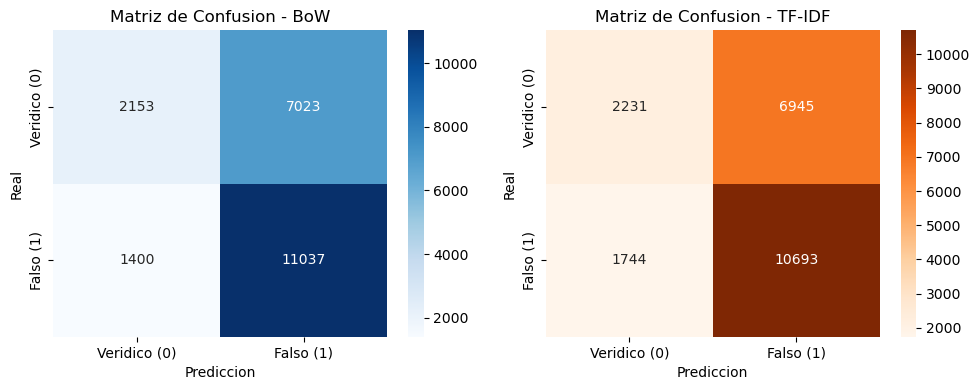

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train_bow = df_bow_entrenamiento
X_train_tfidf = df_idf_nb_entrenamiento
y_train = df_entrenamiento["Label"]  


X_test_bow = vectorizador_bow.transform(df_entrenamiento["Titulo"] + " " + df_entrenamiento["Descripcion"])
X_test_tfidf = vectorizador_tfidf_nb.transform(df_entrenamiento["Titulo"] + " " + df_entrenamiento["Descripcion"])

modelo_nb_bow = MultinomialNB(alpha=0.1)
modelo_nb_bow.fit(X_train_bow, y_train)


modelo_nb_tfidf = MultinomialNB(alpha=0.1)
modelo_nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_bow = modelo_nb_bow.predict(X_test_bow)
y_pred_tfidf = modelo_nb_tfidf.predict(X_test_tfidf)

print(" Evaluacion de Naive Bayes con BoW:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_bow):.4f}")
print(classification_report(y_train, y_pred_bow))

print("\n Evaluacion de Naive Bayes con TF-IDF (sin IDF):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_tfidf):.4f}")
print(classification_report(y_train, y_pred_tfidf))

matriz_confusion_bow = confusion_matrix(y_train, y_pred_bow)
matriz_confusion_tfidf = confusion_matrix(y_train, y_pred_tfidf)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(matriz_confusion_bow, annot=True, fmt="d", cmap="Blues", xticklabels=["Veridico ", "Falso "], yticklabels=["Veridico (0)", "Falso "])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion - BoW")

plt.subplot(1, 2, 2)
sns.heatmap(matriz_confusion_tfidf, annot=True, fmt="d", cmap="Oranges", xticklabels=["Veridico ", "Falso "], yticklabels=["Veridico ", "Falso "])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion - TF-IDF")

plt.tight_layout()
plt.show()


*6.2 Implementacion de Regresion Logistica*

Para la implementacion de Regresion Logistica se realiza con sklearn.

c:\Users\SebOg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


 Evaluacion de Regresion Logistica con BoW:
Precision: 0.5925
              precision    recall  f1-score   support

           0       0.96      0.04      0.08      9176
           1       0.59      1.00      0.74     12437

    accuracy                           0.59     21613
   macro avg       0.78      0.52      0.41     21613
weighted avg       0.75      0.59      0.46     21613



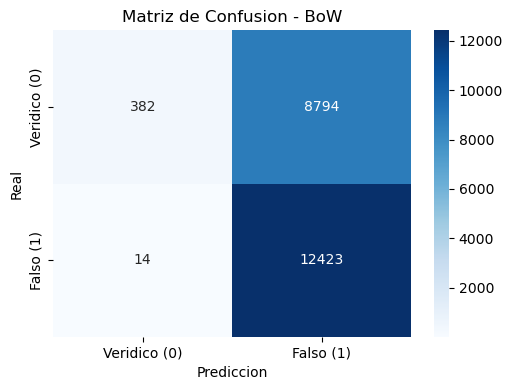

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train_bow = df_bow_entrenamiento
y_train = df_entrenamiento["Label"]  

X_test_bow = vectorizador_bow.transform(df_entrenamiento["Titulo"] + " " + df_entrenamiento["Descripcion"])

modelo_rl = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 1.2})
modelo_rl.fit(X_train_bow, y_train)


y_pred_bow = modelo_rl.predict(X_test_bow)

print(" Evaluacion de Regresion Logistica con BoW:")
print(f"Precision: {accuracy_score(y_train, y_pred_bow):.4f}")
print(classification_report(y_train, y_pred_bow))

matriz_confusion = confusion_matrix(y_train, y_pred_bow)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Veridico ", "Falso "], yticklabels=["Veridico ", "Falso "])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion - BoW")

plt.tight_layout()
plt.show()




A partir de estos resultados, podemos observar que el algoritmo presenta un problema de sesgo, puesto que asigna las predicciones como noticias falsas. Esto sucede debido a que el algoritmo tiene un umbral de 50% para decidir si una noticia es falsa o no, y si lo sobrepasa se le asigna 1. Dado esto, se decide implementar un pequeño cambio en su umbral para demostrar sus cambios.

c:\Users\SebOg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


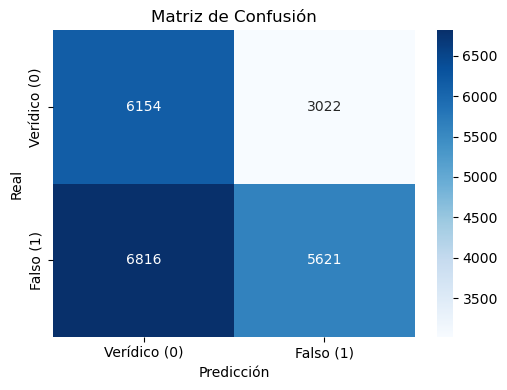


 Evaluacion con umbral ajustado:
Precision: 0.5448
              precision    recall  f1-score   support

           0       0.47      0.67      0.56      9176
           1       0.65      0.45      0.53     12437

    accuracy                           0.54     21613
   macro avg       0.56      0.56      0.54     21613
weighted avg       0.58      0.54      0.54     21613



In [ ]:
#Modificacion al umbral
y_prob_bow = modelo_rl.predict_proba(X_test_bow)[:, 1] 
y_pred_bow_ajustado = (y_prob_bow > 0.625).astype(int) 

matriz_confusion = confusion_matrix(y_train, y_pred_bow_ajustado)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Verídico ", "Falso "], yticklabels=["Verídico ", "Falso "])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

plt.tight_layout()
plt.show()


print("\n Evaluacion con umbral ajustado:")
print(f"Precision: {accuracy_score(y_train, y_pred_bow_ajustado):.4f}")
print(classification_report(y_train, y_pred_bow_ajustado))


Como se puede observar, al cambiar el umbral se cambia su precision y su f1-score, mostrando que es una mejor decision establecer un umbral mas alto al preestablecido por la libreria en el caso de estudio.

*6.3 Implementacion de Random Forest*

5
 Evaluación de Random Forest con BoW:
Accuracy: 0.6446
              precision    recall  f1-score   support

           0       0.98      0.17      0.28      9176
           1       0.62      1.00      0.76     12437

    accuracy                           0.64     21613
   macro avg       0.80      0.58      0.52     21613
weighted avg       0.77      0.64      0.56     21613



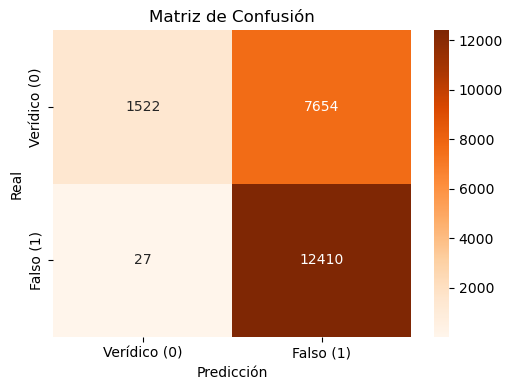

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train_bow = df_bow_entrenamiento.values
X_train_tfidf = df_idf_nb_entrenamiento.values
y_train = df_entrenamiento["Label"].values 


modelo_rf = RandomForestClassifier(n_estimators=1000, max_depth=30,class_weight="balanced", random_state=42, n_jobs=4)
modelo_rf.fit(X_train_tfidf, y_train)
print(5)

X_test_tfidf=vectorizador_tfidf_nb.fit_transform(textos_entrenamiento)
y_test = df_entrenamiento["Label"].values 


y_pred_tfidf = modelo_rf.predict(X_test_tfidf)

print(" Evaluación de Random Forest con BoW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(classification_report(y_test, y_pred_tfidf))

matriz_confusion = confusion_matrix(y_test, y_pred_tfidf)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Verídico ", "Falso "], yticklabels=["Verídico ", "Falso "])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

plt.tight_layout()
plt.show()



Dado este resultado, se le modifica el umbral para que le cueste mas al modelo escoger los falsos.

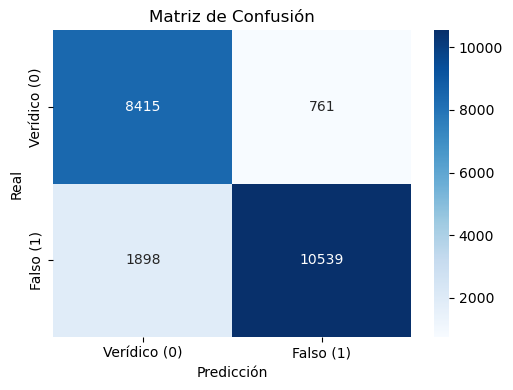


 Evaluacion con umbral ajustado:
Precision: 0.8770
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      9176
           1       0.93      0.85      0.89     12437

    accuracy                           0.88     21613
   macro avg       0.87      0.88      0.88     21613
weighted avg       0.88      0.88      0.88     21613



In [ ]:
#Modificacion al umbral
y_prob_bow = modelo_rf.predict_proba(X_test_tfidf)[:, 1] 
y_pred_bow_ajustado = (y_prob_bow > 0.502).astype(int) 

matriz_confusion = confusion_matrix(y_train, y_pred_bow_ajustado)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Verídico ", "Falso "], yticklabels=["Verídico ", "Falso "])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

plt.tight_layout()
plt.show()


print("\n Evaluacion con umbral ajustado:")
print(f"Precision: {accuracy_score(y_train, y_pred_bow_ajustado):.4f}")
print(classification_report(y_train, y_pred_bow_ajustado))


*6.4 Implementacion de KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X_train_bow = df_bow_entrenamiento.values.astype("float32")  
X_train_tfidf = df_idf_nb_entrenamiento.values.astype("float32")  
y_train = df_entrenamiento["Label"]  

scaler_bow = MinMaxScaler()
X_train_bow_scaled = scaler_bow.fit_transform(X_train_bow)

scaler_tfidf = MinMaxScaler()
X_train_tfidf_scaled = scaler_tfidf.fit_transform(X_train_tfidf)

modelo_knn_bow = KNeighborsClassifier(n_neighbors=5, metric="cosine") 
modelo_knn_bow.fit(X_train_bow_scaled, y_train)

modelo_knn_tfidf = KNeighborsClassifier(n_neighbors=5, metric="cosine")
modelo_knn_tfidf.fit(X_train_tfidf_scaled, y_train)

X_test_bow = vectorizador_bow.transform(df_entrenamiento["Titulo"] + " " + df_entrenamiento["Descripcion"])
X_test_bow_scaled = scaler_bow.transform(X_test_bow)

X_test_tfidf = vectorizador_tfidf_nb.transform(df_entrenamiento["Titulo"] + " " + df_entrenamiento["Descripcion"])
X_test_tfidf_scaled = scaler_tfidf.transform(X_test_tfidf)

y_test = df_entrenamiento["Label"]


y_pred_bow = modelo_knn_bow.predict(X_test_bow_scaled)
y_pred_tfidf = modelo_knn_tfidf.predict(X_test_tfidf_scaled)


print(" Evaluacion de KNN con BoW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print(classification_report(y_test, y_pred_bow))

print("\n Evaluacion de KNN con TF-IDF (sin IDF):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(classification_report(y_test, y_pred_tfidf))


MemoryError: Unable to allocate 3.38 GiB for an array with shape (21613, 42040) and data type float32

Con este algoritmo se tuvo el problema de la memoria para ejecutarlo, lo cual era de esperarse debido a que este algoritmo trabaja mejor con pequeñas cantidades de datos. Al pasarle grandes cantidades de datos, no funciona (incluso intentandolo optimizar con el tipo de dato float32).

**7 Codigo para exportar con el modelo escogido**

In [123]:
df_prueba["Texto Procesado"] = textos_prueba

X_prueba_tfidf = vectorizador_tfidf_nb.transform(df_prueba["Texto Procesado"])

y_prob_prueba = modelo_rf.predict_proba(X_prueba_tfidf)[:, 1]  

y_pred_prueba = (y_prob_prueba > 0.502).astype(int)

df_prueba["Label"] = y_pred_prueba

df_prueba.to_csv("fake_news_test_prediccion.csv", index=False)

print(df_prueba.head())

   ID                                             Titulo  \
0  ID  la mesa del congreso censura un encuentro inte...   
1  ID  la brecha digital que dificulta el acceso de a...   
2  ID  pp apremia al equo a presentar una propuesta d...   
3  ID  de soberano garante de la democracia a rey cor...   
4  ID  el gobierno aprobará este martes detraer los b...   

                                         Descripcion      Fecha  \
0  portavoces de ciudadanos pnv upn psoe unidos p... 2018-10-30   
1  no es la primera vez que los ciudadanos vulner... 2023-03-15   
2  el partido morado reprocha que los socialistas... 2019-07-01   
3  la renuncia de felipe vi a su herencia procede... 2020-03-16   
4  el ejecutivo también prorrogará la suspensión ... 2021-09-13   

   longitud_titulo  longitud_descripcion   año  \
0              100                   119  2018   
1              121                   197  2023   
2               95                   215  2019   
3               75                  